In [1]:
from src.NMR_predict import GPR_NMR

In [4]:
# Define path to xyz files and path to SOAP files

XYZ_directory = ['/home/alex/Pt_NMR/data/structures/train_split/',
                 '/home/alex/Pt_NMR/data/structures/test_split/']

SOAP_directory = ['/home/alex/Pt_NMR/data/representations/SOAP/train/',
                  '/home/alex/Pt_NMR/data/representations/SOAP/test/']

target_path = ['/home/alex/Pt_NMR/data/labels/train_test_split/indexed_targets_train.csv',
               '/home/alex/Pt_NMR/data/labels/train_test_split/indexed_targets_test.csv']

# Define list of SOAP params [r_cut, n_max, l_max]
params = [2.0, 3, 7]

# Create instance of GPR_NMR class
pt_gpr = GPR_NMR(descriptor_path=SOAP_directory, descriptor_type='SOAP',
                 descriptor_params=params, central_atom='Pt', mode ='write',
                 xyz_path=XYZ_directory, xyz_base='st_', target_path=target_path)



 Optimized noise: 0.002477488604758941 



/home/alex/anaconda3/envs/Pt_NMR/lib/python3.10/site-packages/sklearn/gaussian_process/_gpr.py:659: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/home/alex/anaconda3/envs/Pt_NMR/lib/python3.10/site-packages/sklearn/gaussian_process/_gpr.py:659: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


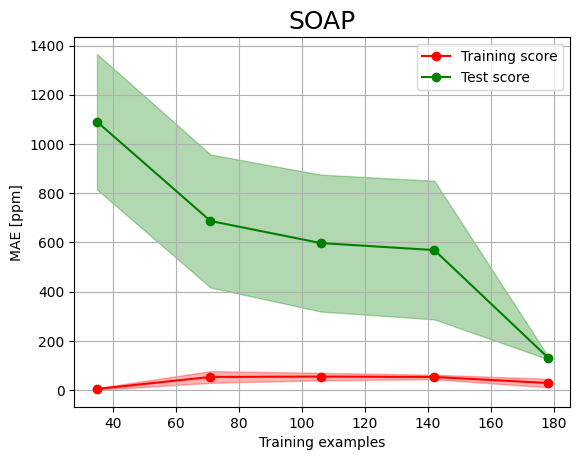

Outliers (10):
------------
Compound Name: cis-[Pt(NH3)(SOMe2)2(H2O)]2+, Observed: -3426, Predicted: -2920.981504994681, Residual: -505.018495005319
Compound Name: trans-[Pt(SMe2)Cl2], Observed: -3424, Predicted: -3763.2095098814757, Residual: 339.2095098814757
Compound Name: trans-[Pt(SMe2)Br2], Observed: -3899, Predicted: -4309.584659995946, Residual: 410.5846599959459
Compound Name: trans-[Pt(PMe3)I2], Observed: -5539, Predicted: -4952.974985051131, Residual: -586.0250149488693
Compound Name: trans-Pt(SCN)2(SbMe3)2, Observed: -4570, Predicted: -5163.322635331113, Residual: 593.3226353311129
Compound Name: [Pt(NCS)(SCN)(NCS)(NMe3)]-, Observed: -2605, Predicted: -2874.105443232329, Residual: 269.105443232329
Compound Name: [Pt(NCS)3(NMe3)]-, Observed: -2088, Predicted: -2488.220702043528, Residual: 400.22070204352804
Compound Name: [Pt(SOMe2)3Cl]+, Observed: -3845, Predicted: -3522.533735480082, Residual: -322.4662645199178
Compound Name: [Pt(SOMe2)(OH)3]-, Observed: -2526, Predicted:

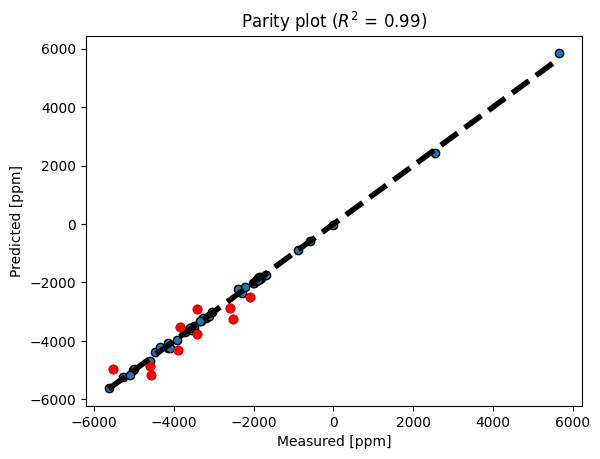

Empirical coverage of model for holdout set: 0.9
Errors on holdout test set (Backend: sklearn): 
-----------------------------------------
MAE: 113.1428981401152 [ppm]
RMSE: 199.76743321237592 [ppm]
-----------------------------------------
CV errors and stdev on training set (Backend: sklearn):
(127.3466507099124, 12.068818641244885, 199.77253192536122, 34.37475121039954, 0.002477488604758941) 



In [5]:
# Use predict function for GPR and obtaining CV prediction errors
errors_std = pt_gpr.GPR_train(kernel_degree=3, noise=1.0, noise_estim=True, lc=True)
test_errors = pt_gpr.GPR_test(kernel_degree=3, noise=1.0, noise_estim=True, parity_plot=True, ecp=True)

print('CV errors and stdev on training set (Backend: sklearn):')
print(errors_std, '\n')

#Testing K-fold with GPyTorch

#gpytorch_errors = pt_gpr.GPR_train_gpytorch(kernel_degree=2, noise=1e-3, n_splits=4, noise_estim=False)
#gpytorch_test_errors = pt_gpr.GPR_test_gpytorch(kernel_degree=2, noise=1e-3)

#print('CV errors and stdev on training set (Backend: GPyTorch):')
#print(gpytorch_errors)


In [2]:
XYZ_directory = ['/home/alex/Pt_NMR/data/structures/train_split/',
                 '/home/alex/Pt_NMR/data/structures/test_split/']

APE_RF_directory = ['/home/alex/Pt_NMR/data/representations/APE_RF/train/',
                  '/home/alex/Pt_NMR/data/representations/APE_RF/test/']

target_path = ['/home/alex/Pt_NMR/data/labels/train_test_split/indexed_targets_train.csv',
               '/home/alex/Pt_NMR/data/labels/train_test_split/indexed_targets_test.csv']

# Define list of SOAP params [r_cut, n_max, l_max]
params = [3.5, 2000]

# Create instance of GPR_NMR class
pt_gpr = GPR_NMR(descriptor_path=APE_RF_directory, descriptor_type='APE-RF',
                 descriptor_params=params, central_atom='Pt', mode ='write',
                 xyz_path=XYZ_directory, xyz_base='st_', target_path=target_path)


 Optimized noise: 9.695826644515218 



/home/alex/anaconda3/envs/Pt_NMR/lib/python3.10/site-packages/sklearn/gaussian_process/_gpr.py:659: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/home/alex/anaconda3/envs/Pt_NMR/lib/python3.10/site-packages/sklearn/gaussian_process/_gpr.py:659: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/home/alex/anaconda3/envs/Pt_NMR/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the boun

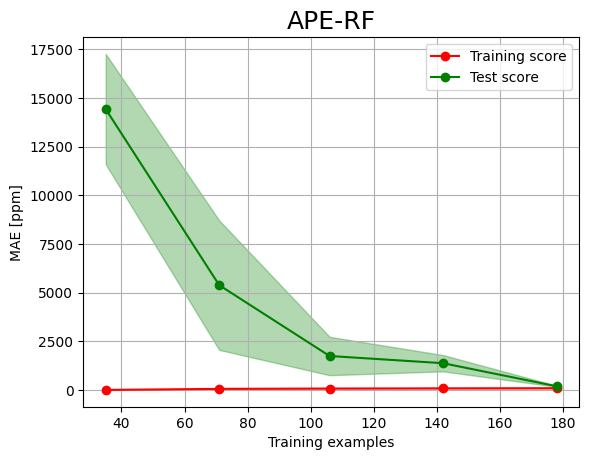

Outliers (16):
------------
Compound Name: cis-Pt(N,N-(Me)4en)Cl2, Observed: -2386, Predicted: -2038.7350391654998, Residual: -347.26496083450024
Compound Name: cis-[Pt(NH3)(SOMe2)2(H2O)]2+, Observed: -3426, Predicted: -3138.4325367727615, Residual: -287.5674632272385
Compound Name: [Pt(en)(SOMe2)Cl]+, Observed: -3307, Predicted: -3051.3772543585765, Residual: -255.62274564142353
Compound Name: [Pt(PMe3)Cl3]-, Observed: -3500, Predicted: -3318.780018511599, Residual: -181.21998148840112
Compound Name: trans-[Pt(SeMe2)Cl2], Observed: -3504, Predicted: -3660.6353772853154, Residual: 156.63537728531537
Compound Name: trans-[Pt(PMe3)Br2], Observed: -4473, Predicted: -4257.640833657449, Residual: -215.35916634255136
Compound Name: trans-[Pt(PMe3)I2], Observed: -5539, Predicted: -5085.448756395648, Residual: -453.55124360435184
Compound Name: trans-Pt(AsMe3)2(SCN)(NCS), Observed: -4159, Predicted: -4334.287792198847, Residual: 175.28779219884655
Compound Name: trans-Pt(AsMe3)2(NCS)2, Observe

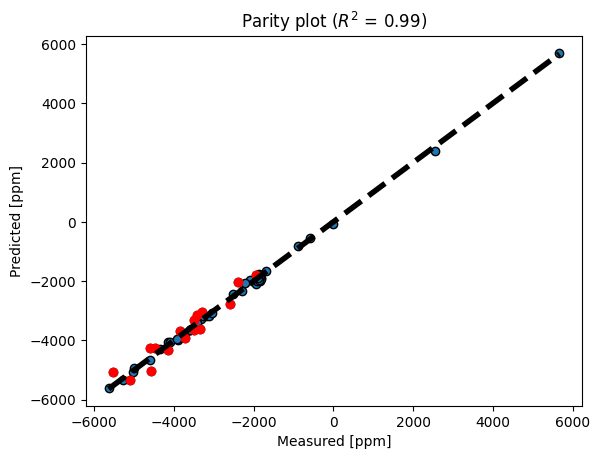

Empirical coverage of model for holdout set: 1.0
Errors on holdout test set (Backend: sklearn): 
-----------------------------------------
MAE: 112.96786487153135 [ppm]
RMSE: 153.74977576511782 [ppm]
-----------------------------------------
CV errors and stdev on training set (Backend: sklearn):
(188.99450399028, 26.197844581625954, 290.6248421755828, 83.80846403538617, 9.695826644515218) 



In [3]:
# Use predict function for GPR and obtaining CV prediction errors
errors_std = pt_gpr.GPR_train(kernel_degree=2, noise=0.01, noise_estim=True, lc=True)
test_errors = pt_gpr.GPR_test(kernel_degree=2, noise=0.01, noise_estim=True, parity_plot=True, ecp=True)

print('CV errors and stdev on training set (Backend: sklearn):')
print(errors_std, '\n')

#Testing K-fold with GPyTorch

#gpytorch_errors = pt_gpr.GPR_train_gpytorch(kernel_degree=2, noise=47500, n_splits=4, noise_estim=False)
#gpytorch_test_errors = pt_gpr.GPR_test_gpytorch(kernel_degree=2, noise=47500)

#print('CV errors and stdev on training set (Backend: GPyTorch):')
#print(gpytorch_errors)


In [6]:
XYZ_directory = ['/home/alex/Pt_NMR/data/structures/train_split/',
                 '/home/alex/Pt_NMR/data/structures/test_split/']

SIF_directory = ['/home/alex/Pt_NMR/data/representations/SIF/train/',
                  '/home/alex/Pt_NMR/data/representations/SIF/test/']

target_path = ['/home/alex/Pt_NMR/data/labels/train_test_split/indexed_targets_train.csv',
               '/home/alex/Pt_NMR/data/labels/train_test_split/indexed_targets_test.csv']

# Define list of params (names of structure-independent features to include in this case)
params = ['EN', 'alpha', 'val', 'qmol']

# Create instance of GPR_NMR class for training (CV) and testing on holdout
pt_gpr = GPR_NMR(descriptor_path=SIF_directory, descriptor_type='SIF',
                 descriptor_params=params, central_atom='Pt', mode ='write',
                 xyz_path=XYZ_directory, xyz_base='st_', target_path=target_path)

/home/alex/anaconda3/envs/Pt_NMR/lib/python3.10/site-packages/sklearn/gaussian_process/_gpr.py:659: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)



 Optimized noise: 0.016405891174346827 



/home/alex/anaconda3/envs/Pt_NMR/lib/python3.10/site-packages/sklearn/gaussian_process/_gpr.py:659: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/home/alex/anaconda3/envs/Pt_NMR/lib/python3.10/site-packages/sklearn/gaussian_process/_gpr.py:659: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/home/alex/anaconda3/envs/Pt_NMR/lib/python3.10/site-packages/sklearn/gaussian_process/_gpr.py:659: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as 

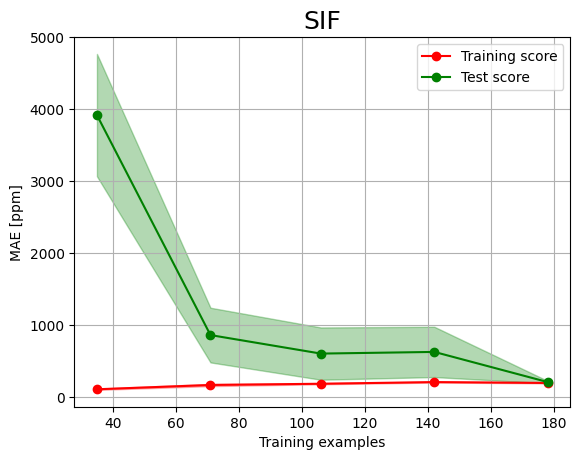

FileNotFoundError: [Errno 2] No such file or directory: '/home/alex/Pt_NMR/data/fits/EN_alpha_val_qmol/GPR_z2_a0.01_SIF.sav'

In [7]:
# Call GPR_train function to obtain cross-validated errors on training set
# Create learning curve and estimate data noise for reliable uncertainties
errors_std = pt_gpr.GPR_train(kernel_degree=2, noise=0.01, noise_estim=True, lc=True)

# Call GPR_test function to obtain mean error on holdout test set
# Create parity plot and compute empirical coverage probability
test_errors = pt_gpr.GPR_test(kernel_degree=2, noise=0.01, parity_plot=True, ecp=True)
